In [68]:
import h5py    
import numpy as np
import matplotlib.pyplot as plt 

train_data = h5py.File("fracture_train_data.h5", 'r')

print(train_data)
print(train_data.keys())


<HDF5 file "fracture_train_data.h5" (mode r)>
<KeysViewHDF5 ['data_index', 'density_train0', 'train_images0', 'train_images1', 'train_labels0']>


In [69]:
dataindex = np.array(train_data["data_index"])

density = np.array(train_data["density_train0"])

images0 = np.array(train_data["train_images0"])

images1 = np.array(train_data["train_images1"])

labels0 = np.array(train_data["train_labels0"])

In [40]:
im0 = np.reshape(images0, (11136,125,300,1))

im1 = np.reshape(images1, (11136,125,300,1))

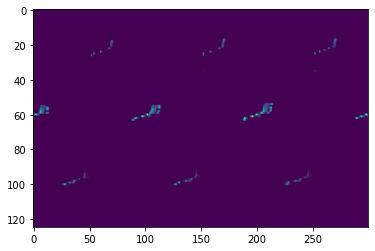

In [4]:
plt.imshow(im0[2780], aspect='auto')

In [44]:
print(labels0[0])
print(type(labels0))

0.19856459330143542
<class 'numpy.ndarray'>


In [45]:
import sklearn
from sklearn import svm
from sklearn.model_selection import GridSearchCV

m = range(len(im0)) # 0,1,2,3,...,n - where n is the number of answers
svm_learn_idx, svm_valid_idx = sklearn.model_selection.train_test_split( m , test_size = 0.20) # shuffle m into learning and validation set.
x_learn = im0[svm_learn_idx] 
x_valid = im0[svm_valid_idx] 
y_learn = labels0[svm_learn_idx] 
y_valid = labels0[svm_valid_idx]  


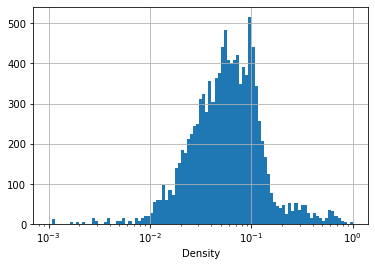

In [67]:
x = np.linspace(-3,0,100)

plt.hist(density, bins=10**x)
plt.xlabel('Density')
plt.xscale("log")
plt.grid("True")

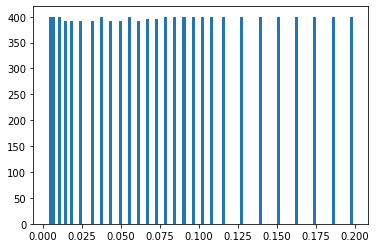

In [17]:
plt.hist(labels0, bins=100);

In [18]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.layers import BatchNormalization

In [57]:
len(set(labels0))
#print(np.unique(labels0))
from keras.utils import to_categorical

y_binary = to_categorical(y_learn, num_classes = 28)

print(y_learn[3:])

print(y_binary[3:])

[0.03708134 0.01913876 0.015311   ... 0.00382775 0.1507177  0.10885167]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [48]:
np.random.seed(1942)
model = keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', input_shape = (125,300,1),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation= 'relu'))
model.add(Dense(28, activation= 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 125, 300, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 300, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 150, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 150, 32)       9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 62, 150, 32)       128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 75, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 74400)            

In [51]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
history=model.fit(x_learn, y_learn, batch_size=20, epochs=5)

Train on 8908 samples
Epoch 1/5
8908/8908 [==============================] - 196s 22ms/sample - loss: 0.7375 - accuracy: 0.0000e+00
Epoch 2/5
1640/8908 [====>.........................] - ETA: 2:41 - loss: 0.0000e+00 - accuracy: 0.0000e+00

KeyboardInterrupt: 